Roshni Joshi- 21BDS0338
Cluster Centers:
[[0.24233118 0.83469838]
 [0.23902132 0.16035588]
 [0.75516277 0.74172266]
 [0.29521733 0.49149388]
 [0.75659985 0.23789063]]

First 10 Predictions (Cluster Assignments):
[0, 2, 1, 0, 2, 0, 4, 1, 3, 1]


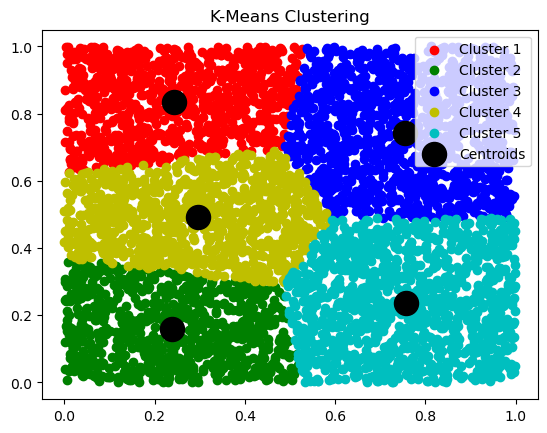

In [8]:
print('Roshni Joshi- 21BDS0338')
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate a large random dataset
def generate_data(num_samples, num_features):
    np.random.seed(42)  # For reproducibility
    return np.random.rand(num_samples, num_features)

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-Means Clustering implementation
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k  # number of clusters
        self.max_iters = max_iters  # max number of iterations
        self.centroids = None
        self.clusters = None

    def fit(self, data):
        num_samples, num_features = data.shape
        
        # Randomly initialize centroids from the data points
        np.random.seed(42)
        random_indices = np.random.choice(num_samples, self.k, replace=False)
        self.centroids = data[random_indices]
        
        for _ in range(self.max_iters):
            # Assign clusters based on closest centroid
            self.clusters = self.create_clusters(data)

            # Store old centroids
            old_centroids = self.centroids

            # Recompute centroids as the mean of the clusters
            self.centroids = self.compute_centroids(data)

            # Check if centroids have stopped moving
            if self.is_converged(old_centroids, self.centroids):
                break

    def create_clusters(self, data):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(data):
            centroid_idx = self.closest_centroid(sample)
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample):
        distances = [euclidean_distance(sample, centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def compute_centroids(self, data):
        centroids = np.zeros((self.k, data.shape[1]))
        for idx, cluster in enumerate(self.clusters):
            centroid = np.mean(data[cluster], axis=0)
            centroids[idx] = centroid
        return centroids

    def is_converged(self, old_centroids, new_centroids):
        distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def predict(self, data):
        predictions = [self.closest_centroid(sample) for sample in data]
        return predictions

# Generate dataset
num_samples = 5000  # Large dataset
num_features = 2  # For visualization, we use 2 features
data = generate_data(num_samples, num_features)

# Apply KMeans
kmeans = KMeans(k=5, max_iters=100)
kmeans.fit(data)
predictions = kmeans.predict(data)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.centroids)

# Print the first 10 predictions
print("\nFirst 10 Predictions (Cluster Assignments):")
print(predictions[:10])

# Plotting the results
def plot_clusters(data, kmeans):
    colors = ['r', 'g', 'b', 'y', 'c']
    for idx, cluster in enumerate(kmeans.clusters):
        cluster_points = data[cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[idx], label=f'Cluster {idx+1}')
    
    # Plot centroids
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='black', label='Centroids')
    plt.title("K-Means Clustering")
    plt.legend()
    plt.show()

plot_clusters(data, kmeans)



Roshni Joshi- 21BDS0338
First 5 rows of the data after PCA dimensionality reduction:
[[ 0.2260199  -0.48421122]
 [ 0.07080906  0.44019668]
 [ 0.23174668 -0.67465464]
 [-0.09616399 -0.01420711]
 [-0.36085158  0.19810937]]


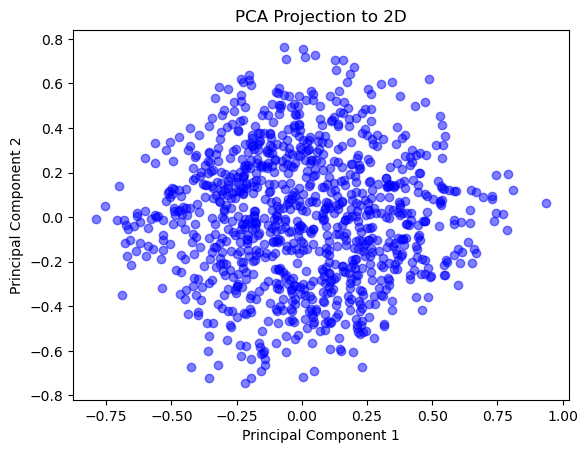

In [9]:
print('Roshni Joshi- 21BDS0338')
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Standardize the dataset
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_data = data - mean
    return std_data, mean

# Step 2: Compute the covariance matrix
def compute_covariance_matrix(data):
    cov_matrix = np.cov(data.T)
    return cov_matrix

# Step 3: Compute eigenvalues and eigenvectors
def compute_eigen(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

# Step 4: Sort eigenvectors by eigenvalues
def sort_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:, idx]
    return sorted_eigenvalues, sorted_eigenvectors

# Step 5: Project the data onto the new feature space
def project_data(data, eigenvectors, num_components):
    projected_data = np.dot(data, eigenvectors[:, :num_components])
    return projected_data

# PCA implementation
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.eigenvectors = None

    def fit(self, data):
        # Standardize the data
        standardized_data, self.mean = standardize_data(data)

        # Compute covariance matrix
        cov_matrix = compute_covariance_matrix(standardized_data)

        # Compute eigenvectors and eigenvalues
        eigenvalues, eigenvectors = compute_eigen(cov_matrix)

        # Sort eigenvectors by eigenvalues
        _, sorted_eigenvectors = sort_eigenvectors(eigenvalues, eigenvectors)

        # Store the top eigenvectors
        self.eigenvectors = sorted_eigenvectors[:, :self.n_components]

    def transform(self, data):
        # Standardize the data using the stored mean
        standardized_data = data - self.mean

        # Project the data onto the new feature space
        projected_data = np.dot(standardized_data, self.eigenvectors)
        return projected_data

# Generate a synthetic dataset (e.g., 1000 samples, 5 features)
np.random.seed(42)
num_samples = 1000
num_features = 5
data = np.random.rand(num_samples, num_features)

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca.fit(data)
projected_data = pca.transform(data)

# Print the first 5 rows of the reduced dimensional data
print("First 5 rows of the data after PCA dimensionality reduction:")
print(projected_data[:5])

# Plot the projected data in 2D
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='blue', alpha=0.5)
plt.title("PCA Projection to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
